# Customer satisfaction prediction

## Dataset structure
| n    | Variable                      | Description                                                  |
| :--- | :---------------------------- | :----------------------------------------------------------- |
| 1    | id                            | Client ID                                                    |
| 2    | Gender                        | Client Gender                                                |
| 3    | Customer type                 | Client type: Premium or Standard                             |
| 4    | Age                           | Client Age                                                   |
| 5    | Price                         | Client Age                                                   |
| 6    | New/Used                      | Client Age                                                   |
| 7    | Category                      | Client Age                                                   |
| 8    | Product description accuracy  | Level of satisfaction on product description                 |
| 9    | Manufacturer stainability     | Level of satisfaction on the manufacturing sustainability process |
| 10   | Packaging quality             | Level of satisfaction on packaging                           |
| 11   | Additional options            | Level of satisfaction on extra options                       |
| 12   | Reviews and ratings           | Level of satisfaction on reviews and rating information      |
| 13   | Integrity of packaging        | Level of satisfaction on packaging state                     |
| 14   | Check-out procedure           | Level of satisfaction on payment procedure                   |
| 15   | Relevance of related products | Level of satisfaction on related product suggestion          |
| 16   | Costumer insurance            | Level of satisfaction on insurance options                   |
| 17   | Shipping delay in days        | Delay of shipping in days                                    |
| 18   | Arrival delay in days         | Arrival delay on days                                        |
| 19   | Satisfaction                  | Target: Satisfied, Not Satisfied                             |

In [45]:
# Import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
%matplotlib inline

## Data cleaning
* Dataset loading
* First outlook of the dataset
* Data cleaning

In [46]:
df_raw = pd.read_csv('../data/raw/model.csv', index_col=0)
df_raw.head()

,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,139Q880b,Female,Premium,60.0,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,Not Satisfied
1,513F768p,Female,Premium,57.0,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,Satisfied
2,933T167j,Female,Premium,38.0,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,Satisfied
3,193N829g,Male,Premium,NaN,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,Not Satisfied
4,661I898j,Male,Premium,37.0,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,Satisfied


In [47]:
df_raw.dtypes

id                                     object
Gender                                 object
Customer Type                          object
Age                                   float64
Price                                 float64
NewUsed                                object
Category                               object
Product description accuracy            int64
Manufacturer sustainability             int64
Packaging quality                       int64
Additional options                      int64
Helpfulness of reviews and ratings      int64
Integrity of packaging                  int64
Ease check-out procedure                int64
Relevance of related products           int64
Costumer insurance                      int64
Shipping delay in days                  int64
Arrival delay in days                   int64
Satisfaction                           object
dtype: object

***
#### Missing values searching

In [48]:
df_raw.isnull().any()

id                                    False
Gender                                False
Customer Type                         False
Age                                    True
Price                                 False
NewUsed                               False
Category                              False
Product description accuracy          False
Manufacturer sustainability           False
Packaging quality                     False
Additional options                    False
Helpfulness of reviews and ratings    False
Integrity of packaging                False
Ease check-out procedure              False
Relevance of related products         False
Costumer insurance                    False
Shipping delay in days                False
Arrival delay in days                 False
Satisfaction                          False
dtype: bool

In [49]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  50000 non-null  object 
 1   Gender                              50000 non-null  object 
 2   Customer Type                       50000 non-null  object 
 3   Age                                 46132 non-null  float64
 4   Price                               50000 non-null  float64
 5   NewUsed                             50000 non-null  object 
 6   Category                            50000 non-null  object 
 7   Product description accuracy        50000 non-null  int64  
 8   Manufacturer sustainability         50000 non-null  int64  
 9   Packaging quality                   50000 non-null  int64  
 10  Additional options                  50000 non-null  int64  
 11  Helpfulness of reviews and ratings  50000

In [50]:
df_raw.isnull().sum()

id                                       0
Gender                                   0
Customer Type                            0
Age                                   3868
Price                                    0
NewUsed                                  0
Category                                 0
Product description accuracy             0
Manufacturer sustainability              0
Packaging quality                        0
Additional options                       0
Helpfulness of reviews and ratings       0
Integrity of packaging                   0
Ease check-out procedure                 0
Relevance of related products            0
Costumer insurance                       0
Shipping delay in days                   0
Arrival delay in days                    0
Satisfaction                             0
dtype: int64

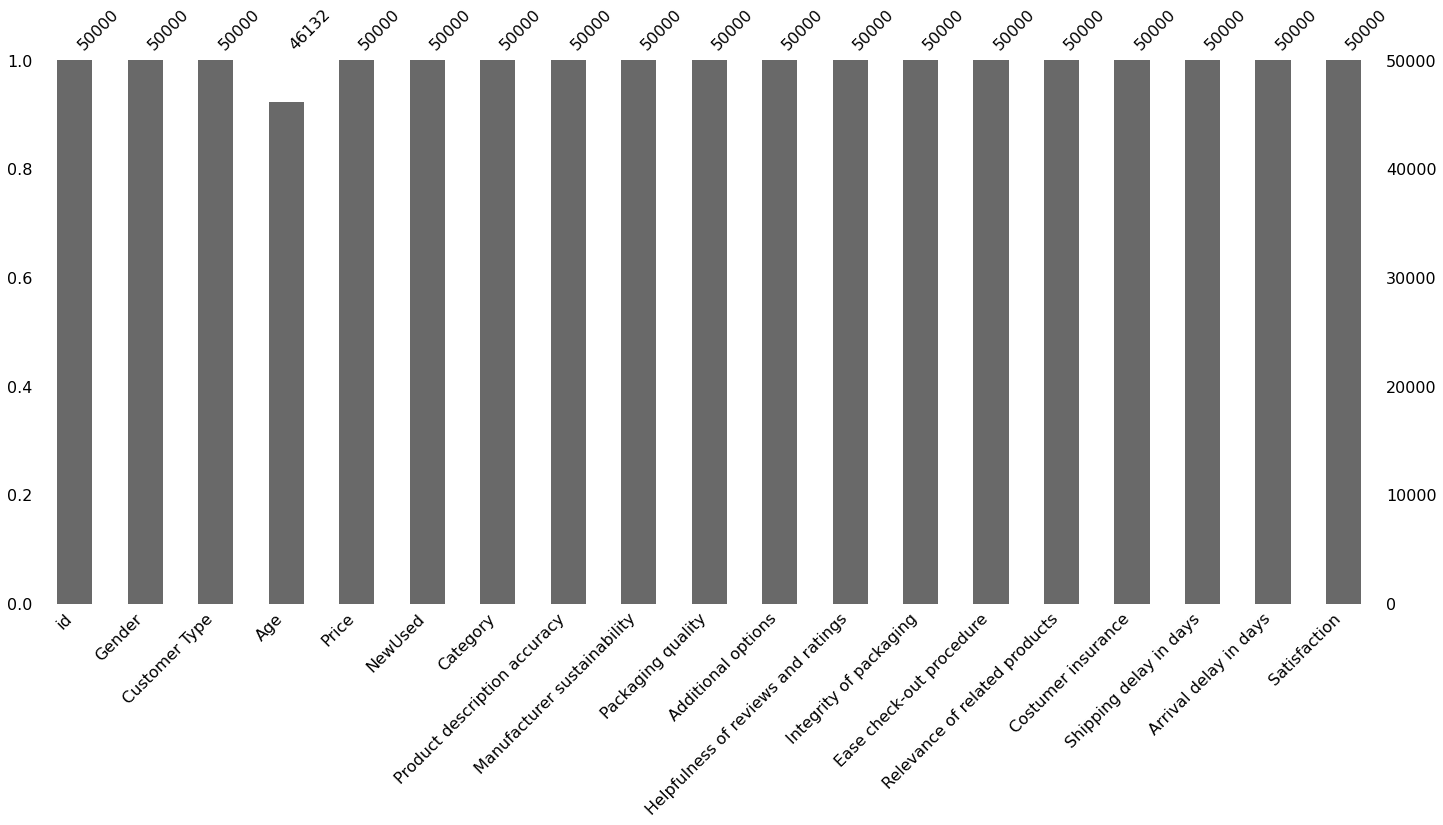

In [51]:
msno.bar(df_raw);

<font color = '457b9d'>There are 3868 <font color = 'red'>NULL</font> values in age column. Let's spot them with <a href = 'https://github.com/ResidentMario/missingno'> missingno</a> library.</font>

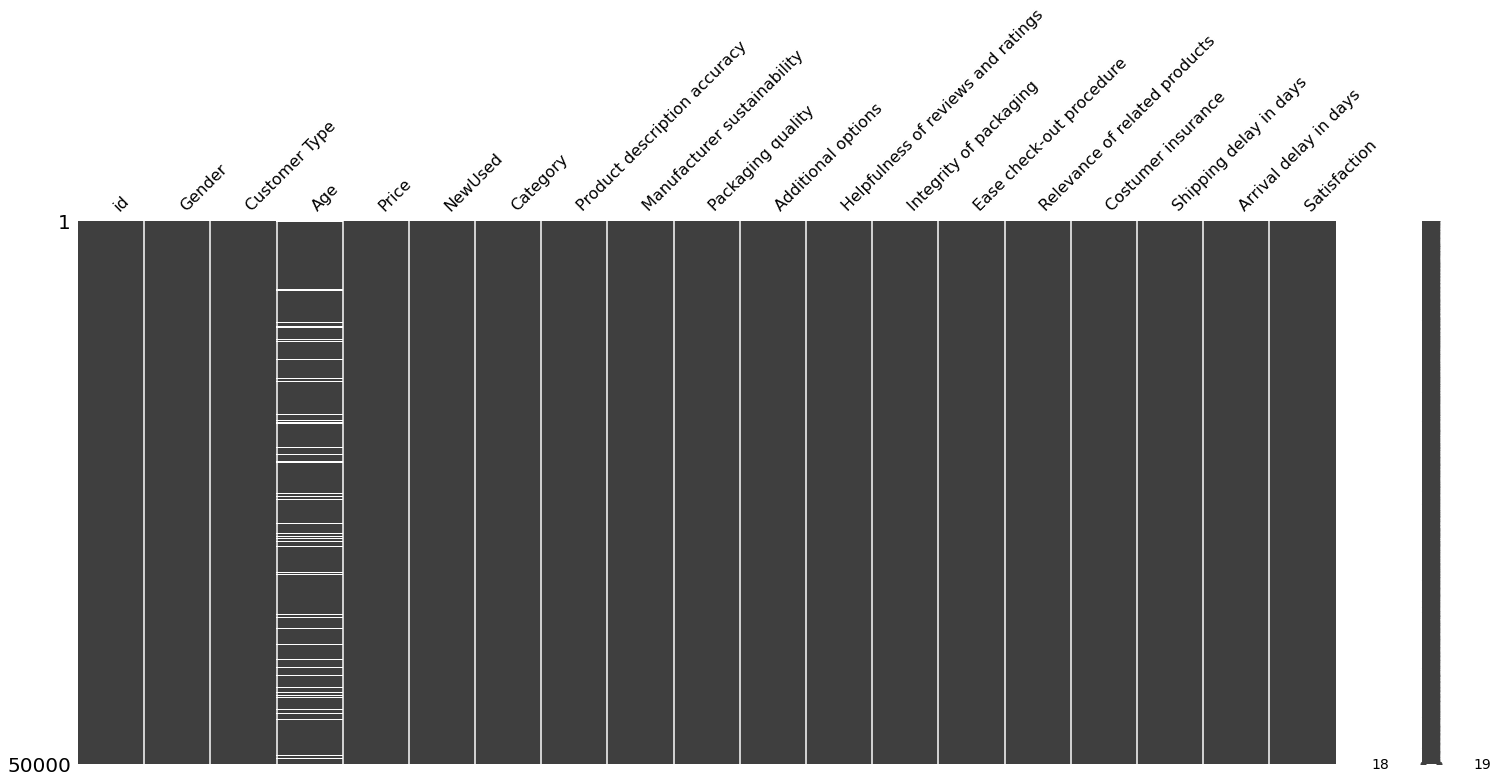

In [52]:
msno.matrix(df_raw);
plt.savefig('../reports/figures/missing_matrix.png', dpi = 200)

>There are no recognizable patterns in NULL values, so these are just persons who preferred to not explicit their age.

***
#### Check categorical data consistency

>Check if some categorical attributes of an istance is written in the wrong way, check if there are duplicate and mapping binary attribute

In [53]:
categorical = ['Gender', 'Satisfaction', 'NewUsed', 'Category', 'Customer Type']
for lab in categorical:
    print('********')
    print(df_raw[lab].value_counts())

********
Male      25325
Female    24675
Name: Gender, dtype: int64
********
Not Satisfied    29498
Satisfied        20502
Name: Satisfaction, dtype: int64
********
New     47171
Used     2829
Name: NewUsed, dtype: int64
********
Technology       18641
Entertainment    14770
Home/Kitchen      9378
Sport             5578
Other             1633
Name: Category, dtype: int64
********
Premium        40732
Not Premium     9268
Name: Customer Type, dtype: int64


>There are no errors in text

In [54]:
df_raw.duplicated().sum()

0

>There are no duplicate

In [55]:
sat = {'Not Satisfied':0,'Satisfied':1}
df_raw['Satisfaction'].replace(sat, inplace = True)
df_raw

,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,139Q880b,Female,Premium,60.0,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,0
1,513F768p,Female,Premium,57.0,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,1
2,933T167j,Female,Premium,38.0,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,1
3,193N829g,Male,Premium,NaN,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,0
4,661I898j,Male,Premium,37.0,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,679X543x,Female,Premium,29.0,156.42,New,Home/Kitchen,1,1,3,3,4,3,1,3,3,0,0,0
49996,110V745c,Female,Premium,28.0,20.03,New,Technology,3,3,5,1,4,4,2,4,5,0,0,0
49997,350E543w,Male,Premium,28.0,70.41,New,Home/Kitchen,5,1,4,1,1,5,4,4,4,0,0,0
49998,685B2d60,Male,Premium,35.0,98.82,New,Entertainment,4,4,1,2,2,2,3,2,3,0,0,0


***
#### Deleting ID column

> In order to find a model, ID feature is useless. Let's drop it.

In [56]:
df_raw[df_raw['id'].duplicated()]

,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
42943,037U619y,Male,Not Premium,25.0,62.12,Used,Home/Kitchen,1,4,5,4,2,3,3,3,5,0,0,0


In [57]:
df_raw[df_raw['id']=='037U619y']

,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
28812,037U619y,Female,Not Premium,37.0,36.67,New,Sport,0,4,4,2,2,5,2,2,4,0,0,0
42943,037U619y,Male,Not Premium,25.0,62.12,Used,Home/Kitchen,1,4,5,4,2,3,3,3,5,0,0,0


> There are two different customer with the same ID and this is not possible, since the ID is unique.

In [58]:
df_raw.drop(labels = df_raw[df_raw['id']=='037U619y'].index , axis = 0, inplace = True)

In [59]:
df_raw[df_raw['id']=='037U619y']

,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction


In [60]:
df_raw.drop(labels = 'id', axis = 1, inplace = True)

***
#### Missing values replacing

In [61]:
df_raw.groupby(['Gender', 'Customer Type'])['Age'].mean()

Gender  Customer Type
Female  Not Premium      31.667575
        Premium          43.909721
Male    Not Premium      31.699851
        Premium          43.923419
Name: Age, dtype: float64

>To fill the missing value in data we can use the mean age of the customer. There is no significance difference between average age by gender but there is a difference between premium and not premium average age. So, we can fill each missing value with the average mean of the costumer's custer.

In [62]:
df_raw['Age'] = df_raw.groupby(['Gender', 'Customer Type'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [63]:
df_raw.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Price                                 0
NewUsed                               0
Category                              0
Product description accuracy          0
Manufacturer sustainability           0
Packaging quality                     0
Additional options                    0
Helpfulness of reviews and ratings    0
Integrity of packaging                0
Ease check-out procedure              0
Relevance of related products         0
Costumer insurance                    0
Shipping delay in days                0
Arrival delay in days                 0
Satisfaction                          0
dtype: int64

<div class="alert alert-success"> All NaN has been replaced, save the new cleaned data.</div>

In [64]:
df_raw.to_csv('../data/interim/model_cleaned.csv')

In [65]:
df_raw.groupby(['Gender', 'Customer Type'])['Age'].mean()

Gender  Customer Type
Female  Not Premium      31.667575
        Premium          43.909721
Male    Not Premium      31.699851
        Premium          43.923419
Name: Age, dtype: float64

>As we can see, the avg age by gender and customer type is still the same.